# Fine-tuning

## Импорт 

In [1]:
!pip install ruclip==0.0.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 2.8 MB/s eta 0:00:00
  Created wheel for youtokentome: filename=youtokentome-1.0.6-cp310-cp310-linux_x86_64.whl size=187956 sha256=b8bab8dfb8196ba7ecf041c87c131fccbbba3eee866265bbc13604fa80604ad4
  Stored in directory: /root/.cache/pip/wheels/df/85/f8/301d2ba45f43f30bed2fe413efa760bc726b8b660ed9c2900c
Successfully built youtokentome
  Attempting uninstall: more-itertools
    Found existing installation: more-itertools 10.2.0
    Uninstalling more-itertools-10.2.0:
      Successfully uninstalled more-itertools-10.2.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.22.2
    Uninstalling huggingface-hub-0.22.2:
      Successfully uninstalled huggingface-hub-0.22.2
ERROR: pip's dependenc

In [2]:
!pip install huggingface-hub==0.19.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 2.7 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.2.1
    Uninstalling huggingface-hub-0.2.1:
      Successfully uninstalled huggingface-hub-0.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ruclip 0.0.2 requires huggingface-hub==0.2.1, but you have huggingface-hub 0.19.4 which is incompatible.


In [3]:
import json
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [4]:
import ruclip

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clip, processor = ruclip.load('ruclip-vit-base-patch32-384', device=device)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


bpe.model:   0%|          | 0.00/748k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/606M [00:00<?, ?B/s]

In [5]:
device

device(type='cuda')

## Получение данных 

### Загрузка данных на kaggle 

In [6]:
import pandas as pd

text = pd.read_csv("/kaggle/input/title-train-df/title_train_df.csv")



def convert_filepaths(df, old_base_path, new_base_path, filepath_column):
    """
    Преобразует пути к файлам в DataFrame.

    Args:
        df (pd.DataFrame): DataFrame, содержащий пути к файлам.
        old_base_path (str): Старый базовый путь, который нужно заменить.
        new_base_path (str): Новый базовый путь.
        filepath_column (str): Название столбца, содержащего пути к файлам.

    Returns:
        pd.DataFrame: DataFrame с преобразованными путями к файлам.
    """

    df[filepath_column] = df[filepath_column].str.replace(old_base_path, new_base_path)
    return df



# Преобразование путей
old_base_path = 'C:/data_for_learning/Horizont ML/full_images/'
new_base_path = '/kaggle/input/wb-images/train_df_384-284/train_df_384-284/'
filepath_column = 'image_path'
title = convert_filepaths(text, old_base_path, new_base_path, filepath_column)


test = pd.read_csv("/kaggle/input/test-wb-text/test_kaggle.csv")
old_base_path = r'C:\data_for_learning\Horizont ML\full_images/'
new_base_path = '/kaggle/input/wb-images/test_df_384-284/test_df_384-284/'
filepath_column = 'image_path'
test  = convert_filepaths(test, old_base_path, new_base_path, filepath_column)

title

,title,image_path
0,Трилогия Метро 2033 Глуховский,/kaggle/input/wb-images/train_df_384-284/train...
1,Детский ксилофон-сортер 0+,/kaggle/input/wb-images/train_df_384-284/train...
2,Бутсы шиповки сороконожки подростковые мужские...,/kaggle/input/wb-images/train_df_384-284/train...
3,Рюкзак кожаный,/kaggle/input/wb-images/train_df_384-284/train...
4,Чешки спортивные,/kaggle/input/wb-images/train_df_384-284/train...
...,...,...
98975,Тактические перчатки военные,/kaggle/input/wb-images/train_df_384-284/train...
98976,Тройник разветвитель для садовых шлангов на 1/...,/kaggle/input/wb-images/train_df_384-284/train...
98977,Дождик Занавес для фотозоны на праздник 2 шт.,/kaggle/input/wb-images/train_df_384-284/train...
98978,Серьги ассиметрия,/kaggle/input/wb-images/train_df_384-284/train...


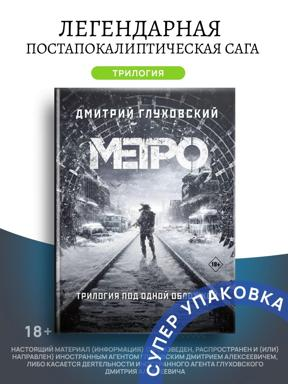

In [7]:
text_list = title['title'].tolist()
image_path = title['image_path'].tolist()
image = Image.open(image_path [0])
text = text_list[0]
image

# Тестирование 

In [8]:
# !pip install onnxruntime
!pip install onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.3 MB/s eta 0:00:00


# Классы для конвертации  

In [9]:
# !pip install onnxruntime
import torch.nn.functional as F
import torch
from torch import nn


class Textual(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.transformer = model.transformer
        self.positional_embedding = model.positional_embedding
        self.transformer = model.transformer
        self.ln_final = model.ln_final
        self.text_projection = model.text_projection
        self.token_embedding = model.token_embedding

    def forward(self, text):
        x = self.token_embedding(text)  # [batch_size, n_ctx, d_model]

        x = x + self.positional_embedding
        x = x.permute(1, 0, 2)  # NLD -> LND
        x = self.transformer(x)
        x = x.permute(1, 0, 2)  # LND -> NLD
        x = self.ln_final(x)

        # x.shape = [batch_size, n_ctx, transformer.width]
        # take features from the eot embedding (eot_token is the highest number in each sequence)
        # needs .float() before .argmax(  ) to work
        x = x[torch.arange(x.shape[0]), text.float().argmax(
            dim=-1)] @ self.text_projection

        return x


def attention(self, x: torch.Tensor):
    # onnx doesn't like multi_head_attention_forward so this is a reimplementation
    self.attn_mask = self.attn_mask.to(
        dtype=x.dtype, device=x.device) if self.attn_mask is not None else None
    q, k, v = (torch.einsum("tbh, oh -> tbo", x, self.attn.in_proj_weight) + self.attn.in_proj_bias).contiguous().chunk(
        3, dim=-1)
    tgt_len = q.shape[0]
    bsz = q.shape[1]
    num_heads = self.attn.num_heads
    head_dim = q.shape[2] // num_heads
    attn_output = scaled_dot_product_attention(
        q.reshape(tgt_len, bsz * num_heads, head_dim).transpose(0, 1),
        k.reshape(tgt_len, bsz * num_heads, head_dim).transpose(0, 1),
        v.reshape(tgt_len, bsz * num_heads,
                  head_dim).transpose(0, 1), self.attn_mask, 0.0
    )
    attn_output = attn_output.transpose(0, 1).contiguous().view(q.shape)
    attn_output = F.linear(
        attn_output, self.attn.out_proj.weight, self.attn.out_proj.bias)
    return attn_output


def scaled_dot_product_attention(Q, K, V, attn_mask, dropout_p):
    if attn_mask is None:
        attn_weight = torch.softmax(
            Q @ K.transpose(-2, -1) / Q.size(-1)**0.5, dim=-1)
    else:
        attn_weight = torch.softmax(
            Q @ K.transpose(-2, -1) / Q.size(-1)**0.5 + attn_mask[None, ...], dim=-1)
    # attn_weight = torch.dropout(attn_weight, dropout_p) # this is always 0.0 in CLIP so I comment it out.
    return attn_weight @ V


DEFAULT_EXPORT = dict(input_names=['input'], output_names=['output'],
                      export_params=True, verbose=False, opset_version=14,
                      do_constant_folding=True,
                      dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}})



import torch
import onnx
from torch import nn
from onnxruntime.quantization import quantize_dynamic, QuantType
#from .utils import Textual, DEFAULT_EXPORT


class clip_converter(nn.Module):
    def __init__(self, model, visual_path: str = "clip_visual.onnx",
                 textual_path: str = "clip_textual.onnx"):
        super().__init__()
        self.model = model
        self.visual_path = visual_path
        self.textual_path = textual_path
        self.visual_flag = False
        self.textual_flag = False
        self.logit_scale = self.model.logit_scale.exp()

        self.model.eval()
        for x in self.model.parameters():
            x.requires_grad = False

    def quantization(self, mode: str = "dynamic"):
        assert mode in ["dynamic"]
        if mode == "dynamic":
            model_quant_visual = f"{self.visual_path}.quant"
            quantize_dynamic(self.visual_path,
                             model_quant_visual,
                             weight_type=QuantType.QUInt8)
            self.visual_path = model_quant_visual

            model_quant_textual = f"{self.textual_path}.quant"
            quantize_dynamic(self.textual_path,
                             model_quant_textual,
                             weight_type=QuantType.QUInt8)
            self.textual_path = model_quant_textual

    def torch_export(self, model, dummy_input, path: str, export_params=DEFAULT_EXPORT):
        torch.onnx.export(model, dummy_input, path, **export_params)

    def onnx_checker(self, path: str):
        model = onnx.load(path)
        onnx.checker.check_model(model)
        del model

    def convert_visual(self, dummy_input, wrapper=lambda x: x,
                       export_params=DEFAULT_EXPORT):
        visual = wrapper(self.model.visual)
        self.torch_export(visual, dummy_input, self.visual_path,
                          export_params=export_params)
        self.onnx_checker(self.visual_path)

    def convert_textual(self, dummy_input, wrapper=Textual,
                        export_params=DEFAULT_EXPORT):
        textual = wrapper(self.model)
        self.torch_export(textual, dummy_input, self.textual_path,
                          export_params=export_params)
        self.onnx_checker(self.textual_path)

    def convert2onnx(self, visual_input=None, textual_input=None, verbose=True,
                     visual_wrapper=lambda x: x,
                     textual_wrapper=Textual,
                     visual_export_params=DEFAULT_EXPORT,
                     textual_export_params=DEFAULT_EXPORT):
        isinstance_visual_input = isinstance(visual_input, (torch.Tensor))
        isinstance_textual_input = isinstance(textual_input, (torch.Tensor))

        if (not isinstance_visual_input) and (not isinstance_textual_input):
            raise Exception("[CLIP ONNX] Please, choose a dummy input")
        elif not isinstance_visual_input:
            print("[CLIP ONNX] Convert only textual model")
        elif not isinstance_textual_input:
            print("[CLIP ONNX] Convert only visual model")

        if isinstance_visual_input:
            self.visual_flag = True
            if verbose:
                print("[CLIP ONNX] Start convert visual model")
            self.convert_visual(
                visual_input, visual_wrapper, visual_export_params)
            if verbose:
                print("[CLIP ONNX] Start check visual model")
            self.onnx_checker(self.visual_path)

        if isinstance_textual_input:
            self.textual_flag = True
            if verbose:
                print("[CLIP ONNX] Start convert textual model")
            self.convert_textual(
                textual_input, textual_wrapper, textual_export_params)
            if verbose:
                print("[CLIP ONNX] Start check textual model")
            self.onnx_checker(self.textual_path)

        if verbose:
            print("[CLIP ONNX] Models converts successfully")
            
            
            



class clip_onnx(clip_converter):
    def __init__(self, model=None,
                 visual_path: str = "clip_visual.onnx",
                 textual_path: str = "clip_textual.onnx"):
        if not isinstance(model, (type(None))):
            super().__init__(model, visual_path, textual_path)
        else:
            print("[CLIP ONNX] Load mode")

    def load_onnx(self, visual_path=None, textual_path=None, logit_scale=None):
        if visual_path and textual_path:
            if not logit_scale:
                raise Exception(
                    "For this mode logit_scale must be specified. Example: model.logit_scale.exp()")
            self.logit_scale = logit_scale
        if visual_path:
            self.visual_path = visual_path
            self.visual_flag = True
        if textual_path:
            self.textual_path = textual_path
            self.textual_flag = True

    def start_sessions(self, providers=['TensorrtExecutionProvider',
                                        'CUDAExecutionProvider',
                                        'CPUExecutionProvider']):
        if self.visual_flag:
            self.visual_session = onnxruntime.InferenceSession(self.visual_path,
                                                               providers=providers)
        if self.textual_flag:
            self.textual_session = onnxruntime.InferenceSession(self.textual_path,
                                                                providers=providers)

    def visual_run(self, onnx_image):
        onnx_input_image = {
            self.visual_session.get_inputs()[0].name: onnx_image}
        visual_output, = self.visual_session.run(None, onnx_input_image)
        return visual_output

    def textual_run(self, onnx_text):
        onnx_input_text = {self.textual_session.get_inputs()[
            0].name: onnx_text}
        textual_output, = self.textual_session.run(None, onnx_input_text)
        return textual_output

    def __call__(self, image, text, device: str = "cpu"):
        assert self.visual_flag and self.textual_flag
        image_features = torch.from_numpy(self.visual_run(image)).to(device)
        text_features = torch.from_numpy(self.textual_run(text)).to(device)

        # normalized features
        image_features = image_features / \
            image_features.norm(dim=-1, keepdim=True)
        text_features = text_features / \
            text_features.norm(dim=-1, keepdim=True)

        # cosine similarity as logits
        logits_per_image = self.logit_scale * image_features @ text_features.t()
        logits_per_text = logits_per_image.t()

        # shape = [global_batch_size, global_batch_size]
        return logits_per_image, logits_per_text

    def encode_image(self, image):
        return self.visual_run(image)

    def encode_text(self, text):
        return self.textual_run(text)

Способ конвертации 

In [11]:
#from clip_onnx import clip_onnx
import torch
import ruclip
import numpy as np
from PIL import Image
import onnxruntime

# # Определение путей для сохранения ONNX моделей
# visual_path = "/kaggle/working/clip_visual.onnx"
# textual_path = "/kaggle/working/clip_textual.onnx"

# Загрузка ruCLIP модели на CPU
model, processor = ruclip.load("ruclip-vit-base-patch32-384", device="cpu")
image = Image.open(image_path[0])

pil_images = [image]
labels = ['диаграмма', 'собака', 'кошка']
dummy_input = processor(text=labels, images=pil_images,
                        return_tensors='pt', padding=True)

# batch first
image = dummy_input["pixel_values"] # torch tensor [1, 3, 384, 384]
image_onnx = dummy_input["pixel_values"].cpu().detach().numpy().astype(np.float32)

# batch first
text = dummy_input["input_ids"] # torch tensor [3, 77]
text_onnx = dummy_input["input_ids"].cpu().detach().numpy()[::-1].astype(np.int64)

#  Импорт класса clip_onnx (предполагается, что он определен в файле 'clip_onnx.py')

visual_path = "clip_visual.onnx"
textual_path = "clip_textual.onnx"

onnx_model = clip_onnx(model, visual_path=visual_path, textual_path=textual_path)
onnx_model.convert2onnx(image, text, verbose=True)

print(f"Визуальная модель сохранена в: {visual_path}")
print(f"Текстовая модель сохранена в: {textual_path}")

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


[CLIP ONNX] Start convert visual model
[CLIP ONNX] Start check visual model
[CLIP ONNX] Start convert textual model


/opt/conda/lib/python3.10/site-packages/torch/onnx/symbolic_opset9.py:5857: UserWarning: Exporting aten::index operator of advanced indexing in opset 14 is achieved by combination of multiple ONNX operators, including Reshape, Transpose, Concat, and Gather. If indices include negative values, the exported graph will produce incorrect results.
  warnings.warn(


[CLIP ONNX] Start check textual model
[CLIP ONNX] Models converts successfully
Визуальная модель сохранена в: clip_visual.onnx
Текстовая модель сохранена в: clip_textual.onnx


In [10]:
import onnxruntime

print(onnxruntime.get_available_providers())

['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']


In [31]:
import onnxruntime

if "CUDAExecutionProvider" in onnxruntime.get_available_providers():
    print("CUDA is available")
else:
    print("CUDA is not available")

CUDA is not available


# модифициуем onnx pipeline 

# Версия от 18.05

In [21]:
import torch
import numpy as np
import pandas as pd
from PIL import Image
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

#import ruclip

class ImageTitleDataset(Dataset):
    def __init__(self, dataframe, processor):
        """
        Класс Dataset для загрузки изображений и соответствующих текстовых описаний из DataFrame.

        Args:
            dataframe (pd.DataFrame): DataFrame, содержащий пути к изображениям и текстовые описания.
            processor: Обработчик текста и изображений (например, токенизатор ruCLIP).
        """
        self.processor = processor
        self.image_paths = dataframe['image_path'].tolist()
        self.titles = dataframe['title'].tolist()

    def __len__(self):
        """Возвращает общее количество пар изображение-текст."""
        return len(self.titles)

    def __getitem__(self, idx):
        """
        Получает пару изображение-текст по индексу.

        Args:
            idx (int): Индекс пары.

        Returns:
            tuple: Кортеж, содержащий тензор изображения и тензор текста.
        """
        image = Image.open(self.image_paths[idx])
        text = self.titles[idx]
        data_dict = self.processor(text=[text], images=[image], return_tensors='pt', padding=True)
        
        # Получаем тензор для изображений
        image_tensor = data_dict['pixel_values'][0]
        # Тензор с IDs для текста
        text_tensor = data_dict['input_ids'][0]

        return image_tensor, text_tensor

def collate_fn(batch):
    """
    Функция collate_fn для DataLoader, обеспечивающая предобработку данных.

    Args:
        batch (list): Список пар изображение-текст.

    Returns:
        tuple: Кортеж, содержащий тензоры изображений и текста.
    """
    images, texts = zip(*batch)
    images = torch.stack(images, dim=0)
    texts = torch.nn.utils.rnn.pad_sequence(texts, batch_first=True, padding_value=0)
    return images, texts

class EmbeddingGenerator:
    def __init__(self, onnx_model):
        """
        Инициализация генератора эмбеддингов.

        Args:
            onnx_model: Загруженная ONNX модель для получения эмбеддингов.
        """
        self.onnx_model = onnx_model
        # Загрузка processor при инициализации
        _, self.processor = ruclip.load("ruclip-vit-base-patch32-384", device="cpu")

    def get_embeddings(self, dataframe, batch_size=16):
        """
        Получает эмбеддинги для всех данных в DataFrame.

        Args:
            dataframe (pd.DataFrame): DataFrame, содержащий пути к изображениям и текстовые описания.
            batch_size (int): Размер пакета для обработки.

        Returns:
            np.ndarray: Эмбеддинги для всех текстов.
            np.ndarray: Эмбеддинги для всех изображений.
        """
        dataset = ImageTitleDataset(dataframe, self.processor)
        dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)

        image_embeddings = []
        text_embeddings = []

        for image_tensors, text_tensors in dataloader:
            # Преобразование в формат ONNX
            images_onnx = image_tensors.cpu().detach().numpy().astype(np.float32)
            texts_onnx = text_tensors.cpu().detach().numpy()[::-1].astype(np.int64)

            # Получаем эмбеддинги с помощью onnx_model
            image_emb = self.onnx_model.encode_image(images_onnx)
            text_emb = self.onnx_model.encode_text(texts_onnx)

            image_embeddings.append(image_emb)
            text_embeddings.append(text_emb)

        # Соединяем все пакеты в один массив
        image_embeddings = np.concatenate(image_embeddings, axis=0)
        text_embeddings = np.concatenate(text_embeddings, axis=0)

        return text_embeddings, image_embeddings

# Пример использования

embedding_generator = EmbeddingGenerator(onnx_model)
text_embeddings, image_embeddings = embedding_generator.get_embeddings(test.head(10))

In [23]:
text_embeddings.shape

(10, 512)

In [39]:
import pandas as pd
import numpy as np
import onnxruntime as ort
from tqdm import tqdm
import ruclip
from PIL import Image
#from clip_onnx import clip_onnx

class ImageTitleDataset(Dataset):
    def __init__(self, dataframe, processor):
        """
        Класс Dataset для загрузки изображений и соответствующих текстовых описаний из DataFrame.

        Args:
            dataframe (pd.DataFrame): DataFrame, содержащий пути к изображениям и текстовые описания.
            processor: Обработчик текста и изображений (например, токенизатор ruCLIP).
        """
        self.processor = processor
        self.image_paths = dataframe['image_path'].tolist()
        self.titles = dataframe['title'].tolist()

    def __len__(self):
        """Возвращает общее количество пар изображение-текст."""
        return len(self.titles)

    def __getitem__(self, idx):
        """
        Получает пару изображение-текст по индексу.

        Args:
            idx (int): Индекс пары.

        Returns:
            tuple: Кортеж, содержащий тензор изображения и тензор текста.
        """
        image = Image.open(self.image_paths[idx])
        text = self.titles[idx]
        data_dict = self.processor(text=[text], images=[image], return_tensors='pt', padding=True)
        
        # Получаем тензор для изображений
        image_tensor = data_dict['pixel_values'][0]
        # Тензор с IDs для текста
        text_tensor = data_dict['input_ids'][0]
        return image_tensor, text_tensor 
        
def create_dataloader(processor, list_image_path, list_txt, batch_size, shuffle=True):
    """
    Создает DataLoader для набора данных ImageTitleDataset.

    Args:
        processor: Обработчик текста.
        list_image_path (list): Список путей к изображениям.
        list_txt (list): Список текстовых описаний.
        batch_size (int): Размер пакета.
        shuffle (bool, optional): Флаг перемешивания данных. По умолчанию True.
        num_workers (int, optional): Количество рабочих процессов для загрузки данных.
                                     По умолчанию -1, что означает использование всех доступных CPU.

    Returns:
        DataLoader: Объект DataLoader для набора данных.
    """
    dataset = ImageTitleDataset(processor, list_image_path, list_txt)
    
   
    
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,  collate_fn=collate_fn)
    return dataloader

class EmbeddingGenerator:
    def __init__(self, visual_onnx_path, textual_onnx_path, logit_scale=np.exp(1.0)):
        """
        Инициализирует класс EmbeddingGenerator.

        Args:
            visual_onnx_path (str): Путь к ONNX файлу визуальной модели.
            textual_onnx_path (str): Путь к ONNX файлу текстовой модели.
            logit_scale (float): Значение logit_scale из оригинальной модели CLIP.
        """
        self.clip_model = clip_onnx()
        self.clip_model.load_onnx(visual_path=visual_onnx_path, textual_path=textual_onnx_path, logit_scale=logit_scale)
        self.clip_model.start_sessions(providers=['CPUExecutionProvider'])
        _, self.processor = ruclip.load("ruclip-vit-base-patch32-384", device="cpu")

    def get_embeddings(self, dataframe, batch_size=16):
        """
        Генерирует эмбеддинги для изображений и текста из DataFrame.

        Args:
            dataframe (pd.DataFrame): DataFrame с колонками 'image_path' и 'title'.
            batch_size (int): Размер батча.

        Returns:
            tuple: Кортеж с двумя numpy массивами: эмбеддинги изображений и эмбеддинги текста.
        """
        image_embeddings = []
        text_embeddings = []

        dataset = ImageTitleDataset(dataframe, self.processor)
        dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)

        with tqdm(total=len(dataloader), desc="Processing batches", leave=True) as pbar:
            for images, texts in dataloader:
                # Конвертация в ONNX формат
                images_onnx = images.cpu().detach().numpy().astype(np.float32)
                texts_onnx = texts.cpu().detach().numpy()[::-1].astype(np.int64)

                # Получение эмбеддингов
                image_embedding = self.clip_model.encode_image(images_onnx)
                text_embedding = self.clip_model.encode_text(texts_onnx)

                image_embeddings.append(image_embedding)
                text_embeddings.append(text_embedding)
                
                pbar.update(1)

        return np.concatenate(image_embeddings), np.concatenate(text_embeddings)
    
visual_path, textual_path = '/kaggle/working/clip_visual.onnx','/kaggle/working/clip_textual.onnx'
# Создание экземпляра EmbeddingGenerator
embedding_generator = EmbeddingGenerator(visual_path, textual_path)


# Получение эмбеддингов
image_embeddings,text_embeddings = embedding_generator.get_embeddings(test.head(100))

print("Text Embeddings Shape:", text_embeddings.shape)
print("Image Embeddings Shape:", image_embeddings.shape)

[CLIP ONNX] Load mode


Processing batches: 100%|██████████| 7/7 [00:31<00:00,  4.55s/it]

Text Embeddings Shape: (100, 512)
Image Embeddings Shape: (100, 512)


# Общий вариант 

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import numpy as np
import onnxruntime as ort
from tqdm import tqdm
import ruclip
from PIL import Image

# Убедитесь, что у вас есть доступный GPU и он выбран в onnxruntime
providers = ["CUDAExecutionProvider"]  # Если GPU доступен
if not ort.get_available_providers():
    providers = ["CPUExecutionProvider"] # Если GPU недоступен, используем CPU

# Для корректной работы onnx
def collate_fn(batch):
    images = [item[0] for item in batch]
    texts = [item[1] for item in batch]

    # Преобразование к тензорам и заполнение
    images = torch.stack(images, dim=0)
    texts = pad_sequence(texts, batch_first=True, padding_value=1)

    return images, texts

class ImageTitleDataset(Dataset):
    def __init__(self, dataframe, processor):
        """
        Класс Dataset для загрузки изображений и соответствующих текстовых описаний из DataFrame.

        Args:
            dataframe (pd.DataFrame): DataFrame, содержащий пути к изображениям и текстовые описания.
            processor: Обработчик текста и изображений (например, токенизатор ruCLIP).
        """
        self.processor = processor
        self.image_paths = dataframe['image_path'].tolist()
        self.titles = dataframe['title'].tolist()

    def __len__(self):
        """Возвращает общее количество пар изображение-текст."""
        return len(self.titles)

    def __getitem__(self, idx):
        """
        Получает пару изображение-текст по индексу.

        Args:
            idx (int): Индекс пары.

        Returns:
            tuple: Кортеж, содержащий тензор изображения и тензор текста.
        """
        image = Image.open(self.image_paths[idx])
        text = self.titles[idx]
        data_dict = self.processor(text=[text], images=[image], return_tensors='pt', padding=True)
        
        # Получаем тензор для изображений
        image_tensor = data_dict['pixel_values'][0]
        # Тензор с IDs для текста
        text_tensor = data_dict['input_ids'][0]
        return image_tensor, text_tensor 

class EmbeddingGenerator:
    def __init__(self, visual_onnx_path, textual_onnx_path, logit_scale=np.exp(1.0)):
        self.clip_model = clip_onnx()  
        self.clip_model.load_onnx(
            visual_path=visual_onnx_path,
            textual_path=textual_onnx_path,
            logit_scale=logit_scale,
        )
        self.clip_model.start_sessions(providers=providers)
        _, self.processor = ruclip.load("ruclip-vit-base-patch32-384", device="cuda")  # Загружаем модель на GPU

    def get_embeddings(self, dataframe, batch_size=32):
        image_embeddings = []
        text_embeddings = []

        dataset = ImageTitleDataset(dataframe, self.processor)
        dataloader = DataLoader(
            dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False
        )

        with tqdm(total=len(dataloader), desc="Processing batches", leave=True) as pbar:
            for images, texts in dataloader:
                # Перенос данных на GPU
                images = images 
                texts = texts

                # 
                images_onnx = images.numpy().astype(np.float32)  
                texts_onnx = texts.numpy()[::-1].astype(np.int64) 

                # Получение эмбеддингов
                image_embedding = self.clip_model.encode_image(images_onnx)
                text_embedding = self.clip_model.encode_text(texts_onnx)

                image_embeddings.append(image_embedding)
                text_embeddings.append(text_embedding)

                pbar.update(1)

        return np.concatenate(image_embeddings), np.concatenate(text_embeddings)


visual_path, textual_path = '/kaggle/working/clip_visual.onnx','/kaggle/working/clip_textual.onnx'
# Создание экземпляра EmbeddingGenerator
embedding_generator = EmbeddingGenerator(visual_path, textual_path)


# Получение эмбеддингов
image_embeddings,text_embeddings = embedding_generator.get_embeddings(test)

print("Text Embeddings Shape:", text_embeddings.shape)
print("Image Embeddings Shape:", image_embeddings.shape)

# Сохранение эмбеддингов
embeddings_path = '/kaggle/working/onnx_model.npz'
np.savez(embeddings_path, text=text_embeddings, img=image_embeddings)

[CLIP ONNX] Load mode


2024-05-19 14:56:23.819876784 [E:onnxruntime:Default, provider_bridge_ort.cc:1548 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1209 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.11: cannot open shared object file: No such file or directory

2024-05-19 14:56:23.819910366 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:861 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirementsto ensure all dependencies are met.
2024-05-19 14:56:25.093942312 [E:onnxruntime:Default, provider_bridge_ort.cc:1548 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1209 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load lib

Text Embeddings Shape: (29807, 512)
Image Embeddings Shape: (29807, 512)


# Замеры 

In [19]:
import pandas as pd
import numpy as np
import onnxruntime as ort
from tqdm import tqdm
import ruclip
import cv2
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import timeit

class ImageTitleDataset(Dataset):
    def __init__(self, dataframe, processor):
        self.processor = processor
        self.image_paths = dataframe['image_path'].tolist()
        self.titles = dataframe['title'].tolist()

    def __len__(self):
        return len(self.titles)
    
    def _load_image(self, image_path):
        """Load an image from a given path and resize to (384, 384)."""
        default_size = (384, 384)
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
#         if image_bgr is None:
#             black_image = Image.new('RGB', default_size, (0, 0, 0))
#             return black_image
        image_pil = Image.fromarray(image_bgr)
        image_pil.thumbnail(default_size) 
        return image_pil

    def __getitem__(self, idx):
        image = self._load_image(self.image_paths[idx])
        text = self.titles[idx]
        data_dict = self.processor(text=[text], images=[image], return_tensors='pt', padding=True)
        
        image_tensor = data_dict['pixel_values'][0]
        text_tensor = data_dict['input_ids'][0]
        return image_tensor, text_tensor 

class EmbeddingGenerator:
    def __init__(self, visual_onnx_path, textual_onnx_path, logit_scale=np.exp(1.0)):
        self.clip_model = clip_onnx()
        self.clip_model.load_onnx(visual_path=visual_onnx_path, textual_path=textual_onnx_path, logit_scale=logit_scale)
        self.clip_model.start_sessions(providers=['CPUExecutionProvider'])
        _, self.processor = ruclip.load("ruclip-vit-base-patch32-384", device="cpu")

    def preprocess(self, dataframe, batch_size=16):
        dataset = ImageTitleDataset(dataframe, self.processor)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
        preprocessed_data = []

        for images, texts in dataloader:
            preprocessed_data.append((images.cpu().detach().numpy().astype(np.float32),
                                      texts.cpu().detach().numpy()[::-1].astype(np.int64)))

        return preprocessed_data

    def get_embeddings(self, preprocessed_data):
        image_embeddings = []
        text_embeddings = []

        for images_onnx, texts_onnx in preprocessed_data:
            image_embedding = self.clip_model.encode_image(images_onnx)
            text_embedding = self.clip_model.encode_text(texts_onnx)

            image_embeddings.append(image_embedding)
            text_embeddings.append(text_embedding)

        return np.concatenate(image_embeddings), np.concatenate(text_embeddings)

visual_path, textual_path = '/kaggle/working/clip_visual.onnx', '/kaggle/working/clip_textual.onnx'
embedding_generator = EmbeddingGenerator(visual_path, textual_path)

# Пример DataFrame


# Функции для измерения времени
def measure_preprocessing_time(embedding_generator, test, batch_size=8):
    return embedding_generator.preprocess(test.head(batch_size))

def measure_model_time(embedding_generator, preprocessed_data):
    return embedding_generator.get_embeddings(preprocessed_data)

# Измерение времени предобработки данных и выполнения модели
sample_preprocessing_times = timeit.repeat(lambda: measure_preprocessing_time(embedding_generator, test.head(1)), repeat=10, number=1)
batch_preprocessing_times = timeit.repeat(lambda: measure_preprocessing_time(embedding_generator, test.head(3), batch_size=3), repeat=10, number=1)

preprocessed_sample_data = measure_preprocessing_time(embedding_generator, test.head(1))
preprocessed_batch_data = measure_preprocessing_time(embedding_generator, test.head(3), batch_size=3)

sample_model_times = timeit.repeat(lambda: measure_model_time(embedding_generator, preprocessed_sample_data), repeat=10, number=1)
batch_model_times = timeit.repeat(lambda: measure_model_time(embedding_generator, preprocessed_batch_data), repeat=10, number=1)

print(f"Среднее время предобработки одного семпла: {np.mean(sample_preprocessing_times)} секунд")
print(f"Стандартное отклонение времени предобработки одного семпла: {np.std(sample_preprocessing_times)} секунд")

print(f"Среднее время выполнения модели для одного семпла: {np.mean(sample_model_times)} секунд")
print(f"Стандартное отклонение времени выполнения модели для одного семпла: {np.std(sample_model_times)} секунд")

print(f"Среднее время предобработки одного батча: {np.mean(batch_preprocessing_times)} секунд")
print(f"Стандартное отклонение времени предобработки одного батча: {np.std(batch_preprocessing_times)} секунд")

print(f"Среднее время выполнения модели для одного батча: {np.mean(batch_model_times)} секунд")
print(f"Стандартное отклонение времени выполнения модели для одного батча: {np.std(batch_model_times)} секунд")

[CLIP ONNX] Load mode


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


Среднее время предобработки одного семпла: 0.010062208799945438 секунд
Стандартное отклонение времени предобработки одного семпла: 0.0015828701711854403 секунд
Среднее время выполнения модели для одного семпла: 0.2740291900999182 секунд
Стандартное отклонение времени выполнения модели для одного семпла: 0.002429555062256647 секунд
Среднее время предобработки одного батча: 0.026465848000088953 секунд
Стандартное отклонение времени предобработки одного батча: 0.0010514146729369775 секунд
Среднее время выполнения модели для одного батча: 0.849316640699999 секунд
Стандартное отклонение времени выполнения модели для одного батча: 0.16268732329745297 секунд


In [57]:
class Pipeline:
    def __init__(self, base_model_name='ruclip-vit-base-patch32-384', fine_tuned_model_path=None, device=None, quiet=True):
        """Initialize the Pipeline with either a base or fine-tuned model.

        Args:
            base_model_name (str): The base model name to load.
            fine_tuned_model_path (str, optional): Path to fine-tuned model checkpoint.
            device (str, optional): Device to use ('cuda' or 'cpu').
            quiet (bool): If True, suppress progress bars in ruclip.Predictor.
        """
        self.device = device if device is not None else ('cuda' if torch.cuda.is_available() else 'cpu')
        self.device = torch.device(self.device)

        # Load the base model and processor
        self.model, self.processor = ruclip.load(base_model_name, device=self.device)

        # Load the fine-tuned model if the path is provided
        if fine_tuned_model_path:
            checkpoint = torch.load(fine_tuned_model_path, map_location=self.device)
            self.model.load_state_dict(checkpoint['model_state_dict'])

        self.model.eval()
        self.predictor = ruclip.Predictor(self.model, self.processor, self.device, quiet=quiet)

   

    class TextDataset(Dataset):
        """Dataset for pairing text and image paths."""
        def __init__(self, df):
            self.texts = df['title'].values
            self.image_paths = df['image_path'].values

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            text = self.texts[idx]
            image_path = self.image_paths[idx]
            return  image_path,text
        
    def _load_image(self, image_path):
        """Load an image from a given path and resize to (384, 384)."""
        default_size = (384, 384)
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image_pil = Image.fromarray(image_bgr)
        image_pil.thumbnail(default_size)

        return image_pil

            
    def preprocess(self, dataframe, batch_size=16):
        dataset = self.TextDataset(dataframe)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
        preprocessed_data = []
        for image_paths, texts in dataloader:
            images = [self._load_image(path) for path in image_paths]
            preprocessed_data.append((images,
                                      texts))

        return preprocessed_data

    def get_embeddings(self, preprocessed_data):
     
        img_embeddings = []
        text_embeddings = []

        
        for images,  texts in preprocessed_data:
            with torch.no_grad():
                text_emb = self.predictor.get_text_latents(texts)
                img_emb = self.predictor.get_image_latents(images)
            img_embeddings.append(img_emb.cpu().numpy())
            text_embeddings.append(text_emb.cpu().numpy())
                

        img_embeddings = np.vstack(img_embeddings)
        text_embeddings = np.vstack(text_embeddings)

        return img_embeddings, text_embeddings
    
    
embedding_generator = Pipeline(base_model_name='ruclip-vit-base-patch32-384')


# Функции для измерения времени
def measure_preprocessing_time(embedding_generator, test, batch_size=8):
    return embedding_generator.preprocess(test.head(batch_size))

def measure_model_time(embedding_generator, preprocessed_data):
    return embedding_generator.get_embeddings(preprocessed_data)

# Измерение времени предобработки данных и выполнения модели
sample_preprocessing_times = timeit.repeat(lambda: measure_preprocessing_time(embedding_generator, test.head(1)), repeat=10, number=1)
batch_preprocessing_times = timeit.repeat(lambda: measure_preprocessing_time(embedding_generator, test.head(3), batch_size=3), repeat=10, number=1)

preprocessed_sample_data = measure_preprocessing_time(embedding_generator, test.head(1))
preprocessed_batch_data = measure_preprocessing_time(embedding_generator, test.head(3), batch_size=3)

sample_model_times = timeit.repeat(lambda: measure_model_time(embedding_generator, preprocessed_sample_data), repeat=10, number=1)
batch_model_times = timeit.repeat(lambda: measure_model_time(embedding_generator, preprocessed_batch_data), repeat=10, number=1)

print(f"Среднее время предобработки одного семпла: {np.mean(sample_preprocessing_times)} секунд")
print(f"Стандартное отклонение времени предобработки одного семпла: {np.std(sample_preprocessing_times)} секунд")

print(f"Среднее время выполнения модели для одного семпла: {np.mean(sample_model_times)} секунд")
print(f"Стандартное отклонение времени выполнения модели для одного семпла: {np.std(sample_model_times)} секунд")

print(f"Среднее время предобработки одного батча: {np.mean(batch_preprocessing_times)} секунд")
print(f"Стандартное отклонение времени предобработки одного батча: {np.std(batch_preprocessing_times)} секунд")

print(f"Среднее время выполнения модели для одного батча: {np.mean(batch_model_times)} секунд")
print(f"Стандартное отклонение времени выполнения модели для одного батча: {np.std(batch_model_times)} секунд")

Среднее время предобработки одного семпла: 0.0035079397002846235 секунд
Стандартное отклонение времени предобработки одного семпла: 0.0006050506031932425 секунд
Среднее время выполнения модели для одного семпла: 0.7962679869999192 секунд
Стандартное отклонение времени выполнения модели для одного семпла: 0.10162557329979896 секунд
Среднее время предобработки одного батча: 0.00973345629990945 секунд
Стандартное отклонение времени предобработки одного батча: 0.002315597110484696 секунд
Среднее время выполнения модели для одного батча: 1.7391235695002252 секунд
Стандартное отклонение времени выполнения модели для одного батча: 0.03196357829294715 секунд


In [58]:
pipeline = Pipeline(base_model_name='ruclip')

def measure_times(pipeline, test_data, repetitions=10, batch_size=8):
    # Вложенная функция для измерения времени предобработки
    def measure_preprocessing_time(embedding_generator, test, batch_size=8):
        return embedding_generator.preprocess(test.head(batch_size))

    # Вложенная функция для измерения времени выполнения модели
    def measure_model_time(embedding_generator, preprocessed_data):
        return embedding_generator.get_embeddings(preprocessed_data)

    # Измеряем время предобработки для одного семпла
    sample_preprocessing_times = timeit.repeat(lambda: measure_preprocessing_time(pipeline, test_data, batch_size=1), repeat=repetitions, number=10)
    
    # Измеряем время предобработки для батча
    batch_preprocessing_times = timeit.repeat(lambda: measure_preprocessing_time(pipeline, test_data, batch_size=batch_size), repeat=repetitions, number=10)
    
    # Предобрабатываем данные
    preprocessed_sample_data = measure_preprocessing_time(pipeline, test_data, batch_size=1)
    preprocessed_batch_data = measure_preprocessing_time(pipeline, test_data, batch_size=batch_size)
    
    # Измеряем время выполнения модели для одного семпла
    sample_model_times = timeit.repeat(lambda: measure_model_time(pipeline, preprocessed_sample_data), repeat=repetitions, number=10)
    
    # Измеряем время выполнения модели для батча
    batch_model_times = timeit.repeat(lambda: measure_model_time(pipeline, preprocessed_batch_data), repeat=repetitions, number=10)
    
    # Создаем DataFrame с результатами
    results_df = pd.DataFrame({
        'sample_preprocessing_times': sample_preprocessing_times,
        'batch_preprocessing_times': batch_preprocessing_times,
        'sample_model_times': sample_model_times,
        'batch_model_times': batch_model_times
    })
    
    return results_df




original_model =  measure_times(pipeline, test, repetitions=10, batch_size=8)
original_model

,sample_preprocessing_times,batch_preprocessing_times,sample_model_times,batch_model_times
0,0.043677,0.227353,7.531526,46.914920
1,0.035018,0.221886,6.844315,46.015656
2,0.035798,0.219227,6.866147,47.784241
3,0.034426,0.223577,6.829321,45.764334
4,0.034580,0.223753,6.805688,46.328010
5,0.035010,0.225811,7.403073,45.654090
6,0.034766,0.227045,6.875531,45.383930
7,0.034846,0.223515,6.905285,50.539724
8,0.035453,0.216139,6.896823,53.735090
9,0.034336,0.215575,6.843417,45.234351


In [59]:
original_model.to_csv("original_model_time.csv")

In [61]:
visual_path, textual_path = '/kaggle/working/clip_visual.onnx', '/kaggle/working/clip_textual.onnx'
embedding_generator = EmbeddingGenerator(visual_path, textual_path)
onnx_model =  measure_times(embedding_generator, test, repetitions=10, batch_size=8)
onnx_model.to_csv("onnx_model_time.csv")
onnx_model

[CLIP ONNX] Load mode


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


,sample_preprocessing_times,batch_preprocessing_times,sample_model_times,batch_model_times
0,0.103305,0.761938,2.843694,21.831416
1,0.092669,0.780481,2.808310,21.623343
2,0.093322,0.766179,3.520056,21.163657
3,0.098612,0.749096,2.809750,21.637406
4,0.097097,0.760040,2.802152,21.045652
5,0.094287,0.751737,2.857542,22.803780
6,0.095164,0.785698,2.787891,21.613100
7,0.095458,0.739525,2.764741,21.562717
8,0.100868,0.769782,2.762409,20.805004
9,0.102188,0.768154,2.842259,21.605338


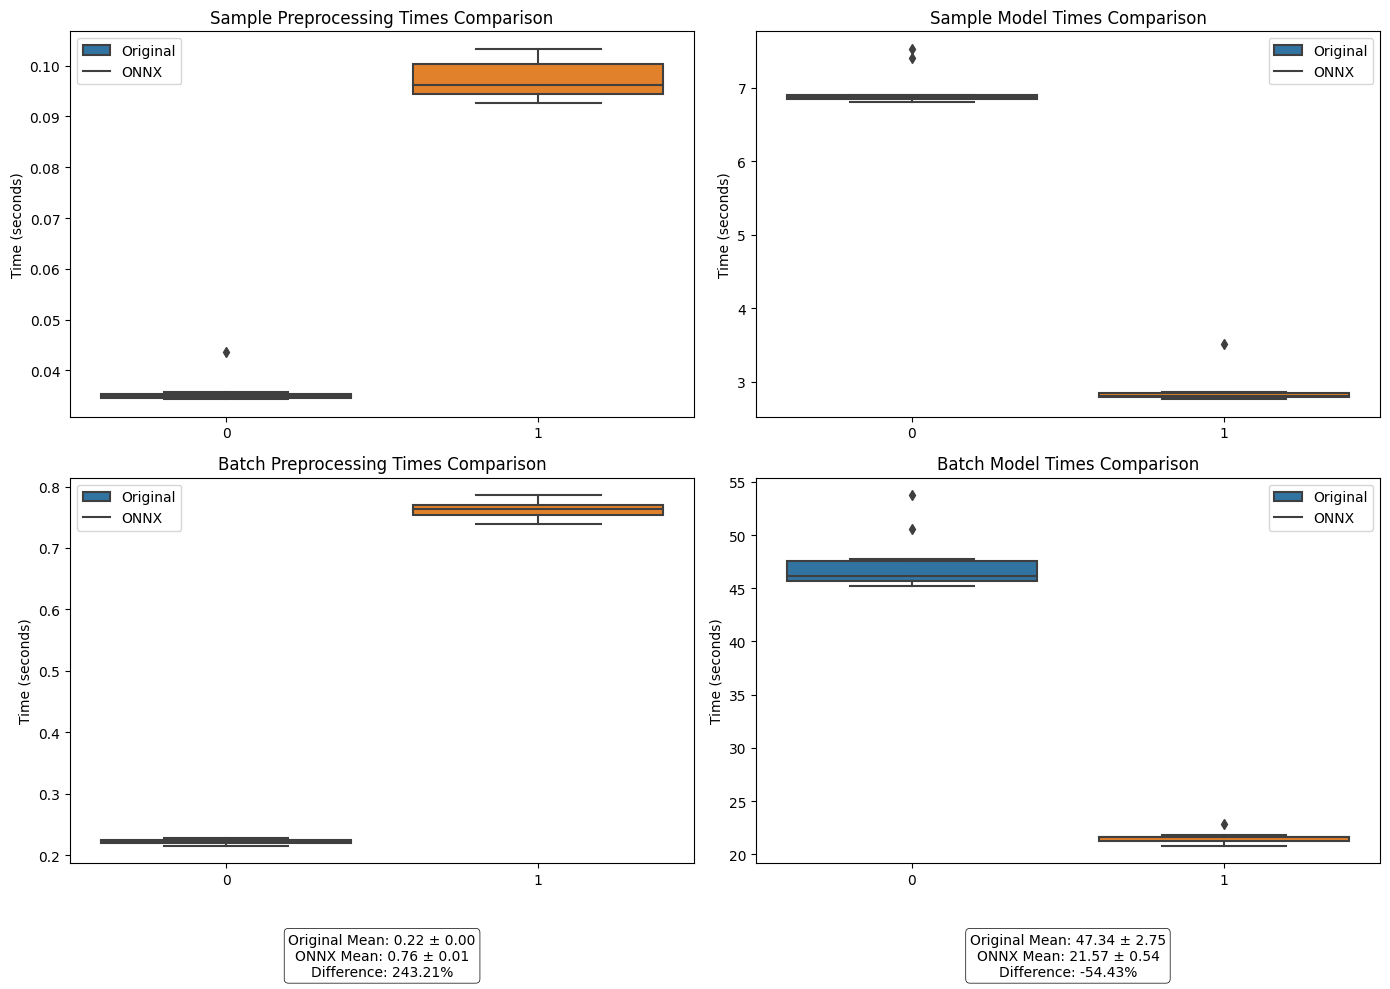

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

def compare_boxplots(df1, df2):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Boxplot для времени предобработки семплов
    sns.boxplot(data=[df1['sample_preprocessing_times'], df2['sample_preprocessing_times']], ax=axes[0, 0])
    axes[0, 0].set_title('Sample Preprocessing Times Comparison')
    axes[0, 0].set_ylabel('Time (seconds)')
    axes[0, 0].legend(['Original', 'ONNX'])
    
    # Boxplot для времени модели семплов
    sns.boxplot(data=[df1['sample_model_times'], df2['sample_model_times']], ax=axes[0, 1])
    axes[0, 1].set_title('Sample Model Times Comparison')
    axes[0, 1].set_ylabel('Time (seconds)')
    axes[0, 1].legend(['Original', 'ONNX'])

    # Boxplot для времени предобработки батчей
    sns.boxplot(data=[df1['batch_preprocessing_times'], df2['batch_preprocessing_times']], ax=axes[1, 0])
    axes[1, 0].set_title('Batch Preprocessing Times Comparison')
    axes[1, 0].set_ylabel('Time (seconds)')
    axes[1, 0].legend(['Original', 'ONNX'])
    
    # Boxplot для времени модели батчей
    sns.boxplot(data=[df1['batch_model_times'], df2['batch_model_times']], ax=axes[1, 1])
    axes[1, 1].set_title('Batch Model Times Comparison')
    axes[1, 1].set_ylabel('Time (seconds)')
    axes[1, 1].legend(['Original', 'ONNX'])

    # Вычисление среднего и стандартного отклонения только для батчевых данных
    batch_preprocessing_mean = df1['batch_preprocessing_times'].mean()
    batch_preprocessing_std = df1['batch_preprocessing_times'].std()
    batch_model_mean = df1['batch_model_times'].mean()
    batch_model_std = df1['batch_model_times'].std()

    # Добавление аннотаций с разницей в процентах для батчевых данных
    preprocessing_difference = ((df2['batch_preprocessing_times'].mean() - batch_preprocessing_mean) / batch_preprocessing_mean * 100)
    model_difference = ((df2['batch_model_times'].mean() - batch_model_mean) / batch_model_mean * 100)

    axes[1, 0].annotate(f"Original Mean: {batch_preprocessing_mean:.2f} ± {batch_preprocessing_std:.2f}\nONNX Mean: {df2['batch_preprocessing_times'].mean():.2f} ± {df2['batch_preprocessing_times'].std():.2f}\nDifference: {preprocessing_difference:.2f}%", 
                    xy=(0.5, 0), xytext=(0, -50), xycoords='axes fraction', textcoords='offset points', ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5))
    axes[1, 1].annotate(f"Original Mean: {batch_model_mean:.2f} ± {batch_model_std:.2f}\nONNX Mean: {df2['batch_model_times'].mean():.2f} ± {df2['batch_model_times'].std():.2f}\nDifference: {model_difference:.2f}%", 
                    xy=(0.5, 0), xytext=(0, -50), xycoords='axes fraction', textcoords='offset points', ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5))

    plt.tight_layout()
    plt.show()





# Пример использования:
compare_boxplots(original_model, onnx_model)


In [68]:
# Импортируем библиотеку для работы с системными данными
import os

# Получаем информацию о процессоре из файловой системы
def get_cpu_info():
    cpu_info = {}
    with open('/proc/cpuinfo', 'r') as f:
        for line in f:
            if line.strip():
                key, value = line.split(':')
                cpu_info[key.strip()] = value.strip()
    return cpu_info

# Получаем информацию и выводим
cpu_info = get_cpu_info()

# Выводим название модели процессора и частоту
model_name = cpu_info.get('model name')
cpu_MHz = cpu_info.get('cpu MHz')

print(f"Processor Model: {model_name}")
print(f"CPU Frequency: {cpu_MHz} MHz")
# Вывод информации о операционной системе
print("Operating System:", platform.system())
print("OS Version:", platform.version())
print("OS Release:", platform.release())

# Вывод информации о процессоре
print("Processor:", platform.processor())

# Вывод информации о памяти
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))
print(f"Total Memory: {psutil.virtual_memory().total / (1024 ** 3):.2f} GB")


# Вывод информации о Python
print("Python Version:", platform.python_version())

Processor Model: Intel(R) Xeon(R) CPU @ 2.20GHz
CPU Frequency: 2200.220 MHz
Operating System: Linux
OS Version: #1 SMP Tue Dec 19 13:14:11 UTC 2023
OS Release: 5.15.133+
Processor: x86_64
Physical cores: 2
Total cores: 4
Total Memory: 31.36 GB
Python Version: 3.10.13


# Тестирование 

In [5]:
import torch

import torch, torchvision
import matplotlib.pyplot as plt
import json
import cv2

#from copy import deepcopy

# from google.colab import drive
# drive.mount('/content/drive')
from transformers import AutoTokenizer
import requests
from PIL import Image
import torch

import torch
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
from tqdm import tqdm
import time

# #from transformers import AlignProcessor, AlignModel

# # We use the original clip-ViT-B-32 for encoding images
# img_model = SentenceTransformer('clip-ViT-B-32')

# # Our text embedding model is aligned to the img_model and maps 50+
# # languages to the same vector space
# text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')




def load_and_process_data(file_path):
    """
    Загружает данные из файла Parquet, удаляет строки с отсутствующими заголовками,
    удаляет лишние пробелы и строки с пропущенными описаниями, а также удаляет изображения с определенным идентификатором.

    Args:
        file_path (str): Путь к файлу Parquet.

    Returns:
        DataFrame: Обработанный DataFrame с данными.
    """
    # Загружаем данные из файла Parquet
    test_df = pd.read_parquet(file_path)

    # Удаляем строки с отсутствующими заголовками
    test_df = test_df[~test_df['title'].isna()]

    # Функция для удаления лишних пробелов и строк с пропущенными описаниями
    def remove_space(df):
        df['title'] = df['title'].replace(r'^\s*$', 'No info', regex=True)
        df['description'] = df['description'].replace(r'^\s*$', 'No info', regex=True)
        df = df[~df['description'].isna()]
        df = df[df['nm'] != 87996913]  # Удаляем пропущенное изображение
        return df

    # Применяем функцию удаления лишних пробелов и строк с пропущенными описаниями
    test_df = remove_space(test_df)

    # Функция для преобразования идентификатора в путь к изображению
    def convert_to_path(num):
        base_path = r"C:\data_for_learning\Horizont ML\full_images"
        return f'{base_path}/{num}.jpg'

    # Добавляем столбец с путями к изображениям
    test_df['image_path'] = test_df['nm'].apply(convert_to_path)

    return test_df

# Загрузка и обработка данных
#test_df = load_and_process_data('/kaggle/input/wb-emb-data/wb_school_test.parquet')
test_df = load_and_process_data(r'C:\data_for_learning\Horizont ML\wb_school_test.parquet')

# male_female_df = pd.read_csv('/kaggle/input/wb-emb-data/male_famele.csv')
# is_child_df =   pd.read_csv('/kaggle/input/wb-emb-data/is_child_df.csv')


male_female_df = pd.read_csv(r"D:\wb\male_famele.csv")
is_child_df =   pd.read_csv(r"D:\wb\is_child_df.csv")

test_df.reset_index(inplace=True)
is_adult_df= pd.DataFrame()
is_adult_df['target'] = test_df['isadult']
is_adult_df['index'] = test_df.index


c:\Users\theju\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model_names = ["original_model",
               'onnx_model'
               
               
               ]
emb_path =[
    r"D:\wb\emb\ruclip-golden.npz",
    r"D:\wb\emb\onnx_model_mb.npz"
    
]

## Логистическая регрессия 

### Бинарная 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

class ContentClassifier:
    def __init__(self, n_splits=5, problem ='binary'):
        self.n_splits = n_splits
        self.model = None
        self.task = problem

    def _concatenate_features(self, X):
        if isinstance(X, list):
            return np.concatenate(X, axis=1)
        else:
            return X

    def fit(self, X, y, оne_score=True):
        average= self.task
        X = self._concatenate_features(X)
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        scores = []


        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Обучение логистической регрессии
            model = LogisticRegression(class_weight='balanced', max_iter=5000)
            model.fit(X_train, y_train)

            # Оценка производительности
            y_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_pred, average=average)
            precision = precision_score(y_val, y_pred, average=average)
            recall = recall_score(y_val, y_pred, average=average)
            scores.append((f1, precision, recall))

        # Обучение финальной модели
        # self.model = LogisticRegression()
        # self.model.fit(X, y)

        if оne_score:
            avg_f1 = sum(score[0] for score in scores) / len(scores)
            avg_precision = sum(score[1] for score in scores) / len(scores)
            avg_recall = sum(score[2] for score in scores) / len(scores)
            return avg_f1, avg_precision, avg_recall
        else:
            return scores

    def predict(self, X):
        if self.model is None:
            raise Exception("Model not trained yet. Call fit() first.")
        X = self._concatenate_features(X)
        return self.model.predict(X)
    
    
def calculate_metrics(X_text, X_img, y,
                      model_name='clip-ViT-B-32-multilingual-v1',
                      task='IsAdult',
                      data_type=['Text', 'Image', 'Combined', 'PCA']):
    # Нормализация данных перед применением PCA и UMAP
    scaler = StandardScaler()

    # Создание объектов классификаторов
    classifier_text = ContentClassifier(n_splits=5)
    classifier_img = ContentClassifier(n_splits=5)
    classifier_combined = ContentClassifier(n_splits=5)
    classifier_pca = ContentClassifier(n_splits=5)
    #classifier_umap = ContentClassifier(n_splits=5)

    # Классификация для текстовых данных
    avg_f1_text, avg_precision_text, avg_recall_text = classifier_text.fit(
        X_text, y)

    # Классификация для изображений
    avg_f1_img, avg_precision_img, avg_recall_img = classifier_img.fit(
        X_img, y)

    # Объединение данных
    X_combined = np.concatenate([X_text, X_img], axis=1)

    # Классификация для объединенных данных
    avg_f1_combined, avg_precision_combined, avg_recall_combined = classifier_combined.fit(
        X_combined, y)

    # Применение PCA
    X_pca = PCA(n_components=512).fit_transform(
        scaler.fit_transform(X_combined))
    avg_f1_pca, avg_precision_pca, avg_recall_pca = classifier_pca.fit(
        X_pca, y)

    # # Применение UMAP
    # X_umap = umap.UMAP(n_components=512).fit_transform(
    #     scaler.fit_transform(X_combined))
    # avg_f1_umap, avg_precision_umap, avg_recall_umap = classifier_umap.fit(
    #     X_umap, y)

    return {
        'Model': model_name,
        'Task': task,
        'Data Type': data_type,
        'Average F1-score': [avg_f1_text, avg_f1_img, avg_f1_combined, avg_f1_pca],
        'Average Precision': [avg_precision_text, avg_precision_img, avg_precision_combined, avg_precision_pca],
        'Average Recall': [avg_recall_text, avg_recall_img, avg_recall_combined, avg_recall_pca ]
    }
    


def get_metics(model_names, emb_path, tasks, df, save_path=r'D:\wb\fine-tuned-ruclip_result.csv'):
    columns = ['Model', 'Task', 'Data Type', 'Average F1-score', 'Average Precision', 'Average Recall']
    result_df = pd.DataFrame(columns=columns)
    
    total_iterations = len(model_names) * len(tasks)
    progress_bar = tqdm(total=total_iterations, desc='Progress')
    
    for model in range(len(model_names)):
        embeddings_path = emb_path[model]
        # Загрузка эмбедингов
        embeddings = np.load(embeddings_path)
        text_embeddings = embeddings['text']
        img_embeddings = embeddings['img']
        model_name = model_names[model]
        
        for i in range(len(tasks)):
            task = tasks[i]
            X_text = text_embeddings[df[i]['index']]
            X_img = img_embeddings[df[i]['index']]
            y = df[i]['target'].values
            
            metrics = calculate_metrics(X_text, X_img, y,
                                        model_name=model_name,
                                        task=task)
            
            metrics = pd.DataFrame(metrics)
            result_df = pd.concat([result_df, metrics])
            result_df.to_csv(save_path)
            
            progress_bar.update(1)
    
    progress_bar.close()
    return result_df

In [8]:
import warnings
warnings.filterwarnings("ignore")

tasks = ['IsAdult','Male/Famale_Clothes','IsChild_Clothes']

df = [is_adult_df,male_female_df,is_child_df]
save_path = r'D:\wb\results\result_binary_log_regression_onnx.csv'
result = get_metics(model_names,emb_path,tasks ,df,save_path)
result

Progress: 100%|██████████| 6/6 [00:24<00:00,  4.05s/it]


,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,original_model,IsAdult,Text,0.743593,0.609573,0.954885
1,original_model,IsAdult,Image,0.409285,0.266460,0.882899
2,original_model,IsAdult,Combined,0.793983,0.682022,0.951647
3,original_model,IsAdult,PCA,0.820553,0.775157,0.873193
0,original_model,Male/Famale_Clothes,Text,0.719484,0.622416,0.853183
1,original_model,Male/Famale_Clothes,Image,0.900279,0.850868,0.956692
2,original_model,Male/Famale_Clothes,Combined,0.923067,0.882528,0.967995
3,original_model,Male/Famale_Clothes,PCA,0.913538,0.914142,0.913349
0,original_model,IsChild_Clothes,Text,0.844498,0.882482,0.809878
1,original_model,IsChild_Clothes,Image,0.922576,0.929724,0.915683


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_relative_metrics(df, base_model_name):
    grouped_df = df.groupby(['Model', 'Data Type']).agg({
        'Average F1-score': 'mean',
        'Average Precision': 'mean',
        'Average Recall': 'mean'
    })

    df = grouped_df.copy()  # создаем копию датафрейма, чтобы не изменять исходный
    base_model = df.loc[base_model_name].copy()

    for (model, data_type), _ in df.groupby(level=[0,1]):
        base_f1 = base_model.loc[data_type, 'Average F1-score']
        base_precision = base_model.loc[data_type, 'Average Precision']
        base_recall = base_model.loc[data_type, 'Average Recall']

        df.loc[(model, data_type), 'Average F1-score'] = (df.loc[(model, data_type), 'Average F1-score'] - base_f1) / base_f1 * 100
        df.loc[(model, data_type), 'Average Precision'] = (df.loc[(model, data_type), 'Average Precision'] - base_precision) / base_precision * 100
        df.loc[(model, data_type), 'Average Recall'] = (df.loc[(model, data_type), 'Average Recall'] - base_recall) / base_recall * 100

    return df

def plot_heatmaps(df, baseline_model_name):
    df = calculate_relative_metrics(df, baseline_model_name).round(3)
    
    # Разделяем наш датафрейм на три датафрейма для каждой метрики
    f1_df = df[['Average F1-score']].unstack()
    precision_df = df[['Average Precision']].unstack()
    recall_df = df[['Average Recall']].unstack()

    # Строим тепловые карты для каждой метрики
    for metric_df, metric_name in zip([f1_df, precision_df, recall_df], ['F1-score', 'Precision', 'Recall']):
        plt.figure(figsize=(10, 8))
        sns.heatmap(metric_df, annot=True, cmap="RdYlGn")
        plt.title(f'Heatmap of Average {metric_name} Percent Changes relative to the model:"{baseline_model_name}"')
        plt.show()

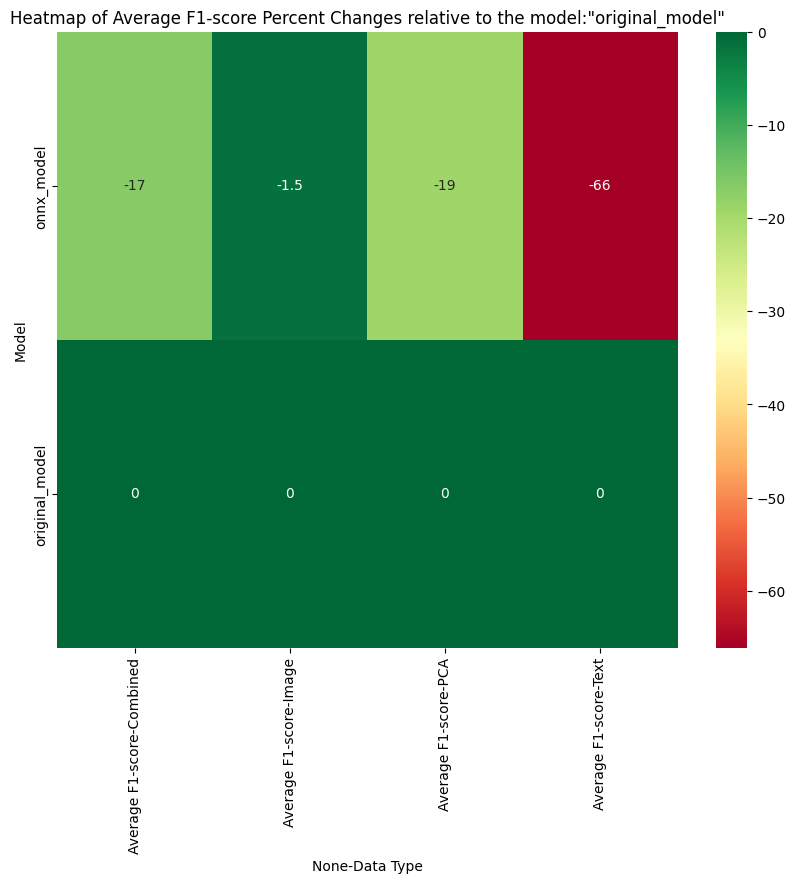

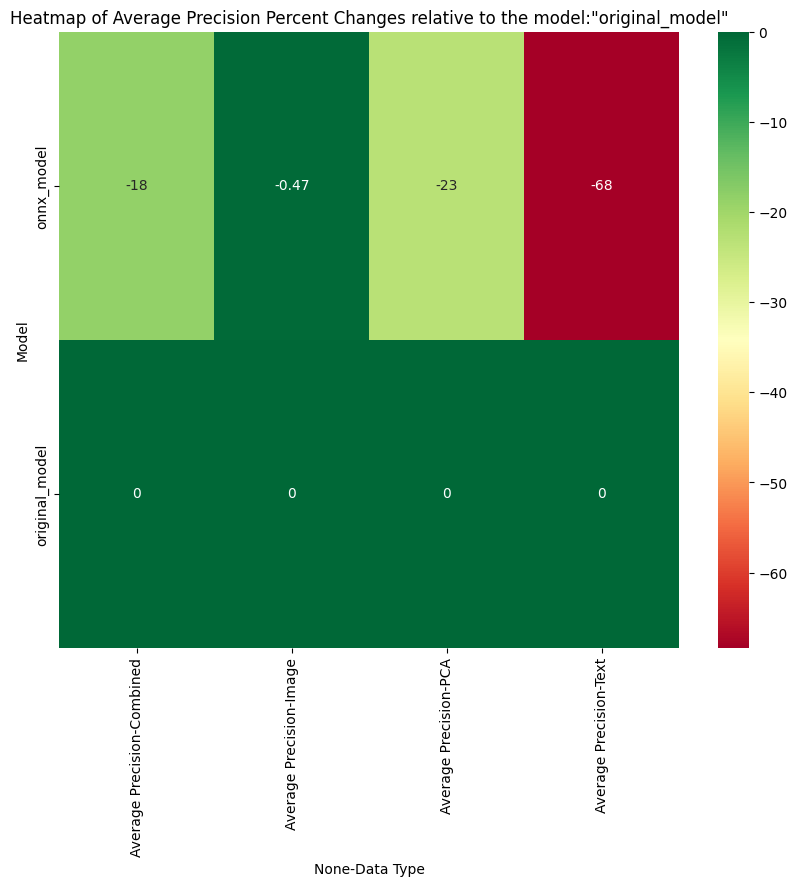

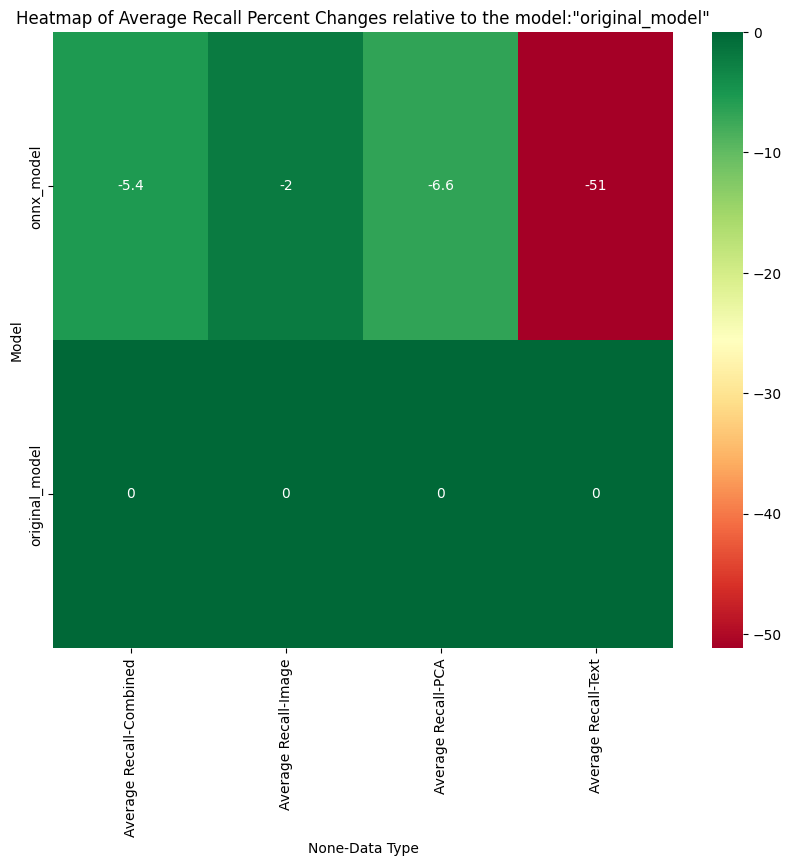

In [10]:
baseline_model_name = "original_model"
plot_heatmaps(result, baseline_model_name)

## Мультикласс 

In [11]:
class ContentClassifier:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits
        self.model = None

    def _concatenate_features(self, X):
        if isinstance(X, list):
            return np.concatenate(X, axis=1)
        else:
            return X

    def fit(self, X, y, average='weighted', one_score=True):
        X = self._concatenate_features(X)
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        scores = []


        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Обучение логистической регрессии
            model = LogisticRegression(class_weight='balanced', max_iter=5000, multi_class='multinomial', solver='lbfgs')
            model.fit(X_train, y_train)

            # Оценка производительности
            y_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_pred, average=average)
            precision = precision_score(y_val, y_pred, average=average)
            recall = recall_score(y_val, y_pred, average=average)
            scores.append((f1, precision, recall))

        # Обучение финальной модели
        # self.model = LogisticRegression()
        # self.model.fit(X, y)

        if one_score:
            avg_f1 = sum(score[0] for score in scores) / len(scores)
            avg_precision = sum(score[1] for score in scores) / len(scores)
            avg_recall = sum(score[2] for score in scores) / len(scores)
            return avg_f1, avg_precision, avg_recall
        else:
            return scores

    def predict(self, X):
        if self.model is None:
            raise Exception("Model not trained yet. Call fit() first.")
        X = self._concatenate_features(X)
        return self.model.predict(X)
    
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных меток в числовые
y_cat = label_encoder.fit_transform(test_df['category'])

def replace_subcategory(df):
    # Создание копии DataFrame
    df_modified = df.copy()

    # Группировка по sub_category и подсчет количества строк в каждой группе
    counts = df_modified.groupby('sub_category').size()

    # Получение списка sub_category, где количество строк меньше 4
    sub_categories_to_replace = counts[counts < 11].index.tolist()

    # Замена sub_category на category для подходящих групп
    for sub_category in sub_categories_to_replace:
        category_value = df_modified.loc[df_modified['sub_category'] == sub_category, 'category'].iloc[0]
        df_modified.loc[df_modified['sub_category'] == sub_category, 'sub_category'] = category_value

    return df_modified

sub_df = replace_subcategory(test_df)


# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных меток в числовые
y_sub = label_encoder.fit_transform(sub_df['sub_category'])


def get_metics(model_names, emb_path, tasks, df,save_path=save_path):
    columns = ['Model', 'Task', 'Data Type', 'Average F1-score', 'Average Precision', 'Average Recall']
    result_df = pd.DataFrame(columns=columns)
    
    total_iterations = len(model_names) * len(tasks)
    progress_bar = tqdm(total=total_iterations, desc='Progress')
    
    for model in range(len(model_names)):
        embeddings_path = emb_path[model]
        # Загрузка эмбедингов
        embeddings = np.load(embeddings_path)
        text_embeddings = embeddings['text']
        img_embeddings = embeddings['img']
        model_name = model_names[model]
        
        for i in range(len(tasks)):
            task = tasks[i]
            X_text = text_embeddings
            X_img = img_embeddings
            y = df[i]
            
            metrics = calculate_metrics(X_text, X_img, y,
                                        model_name=model_name,
                                        task=task)
            
            metrics = pd.DataFrame(metrics)
            result_df = pd.concat([result_df, metrics])
            result_df.to_csv(save_path)
            
            progress_bar.update(1)
    
    progress_bar.close()
    return result_df

In [12]:
import warnings
warnings.filterwarnings("ignore")

tasks = ['Category',"SubCategory"]

df = [y_cat,y_sub]
save_path = r'D:\wb\results\result_multy_log_regression_onnx.csv'

result  = get_metics(model_names, emb_path, tasks, df,save_path)
result 

Progress: 100%|██████████| 4/4 [07:44<00:00, 116.05s/it]


,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,original_model,Category,Text,0.822947,0.827571,0.822525
1,original_model,Category,Image,0.697043,0.704928,0.696514
2,original_model,Category,Combined,0.843907,0.846843,0.843795
3,original_model,Category,PCA,0.815507,0.817631,0.814876
0,original_model,SubCategory,Text,0.608901,0.732490,0.648304
1,original_model,SubCategory,Image,0.472162,0.540708,0.528198
2,original_model,SubCategory,Combined,0.679181,0.759252,0.700775
3,original_model,SubCategory,PCA,0.762813,0.775078,0.767303
0,onnx_model,Category,Text,0.008452,0.019108,0.009226
1,onnx_model,Category,Image,0.643450,0.659223,0.647063


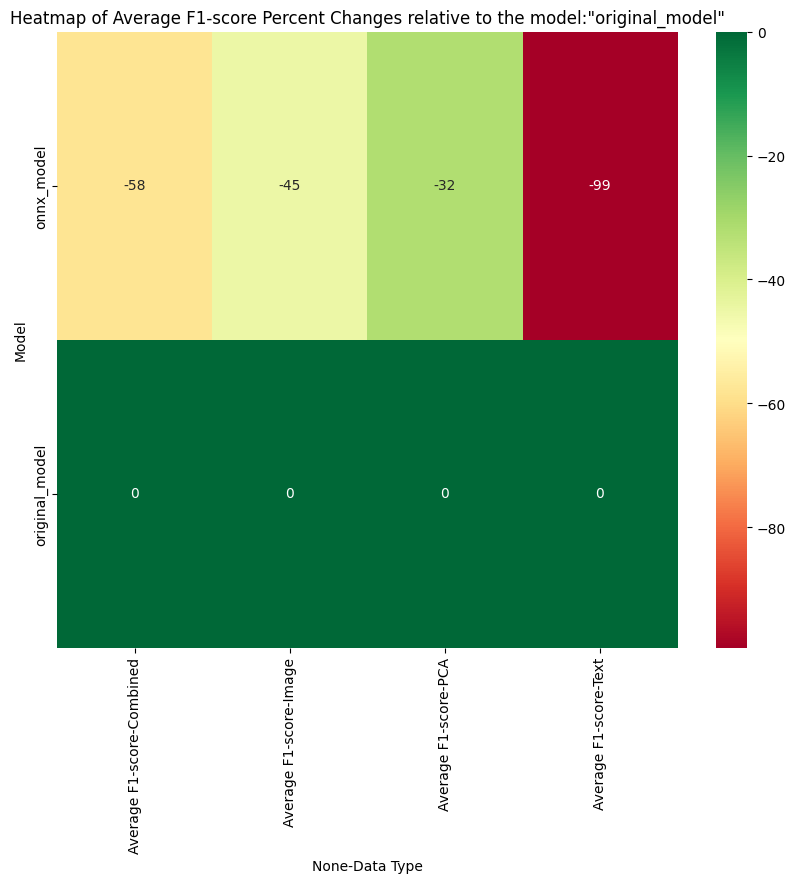

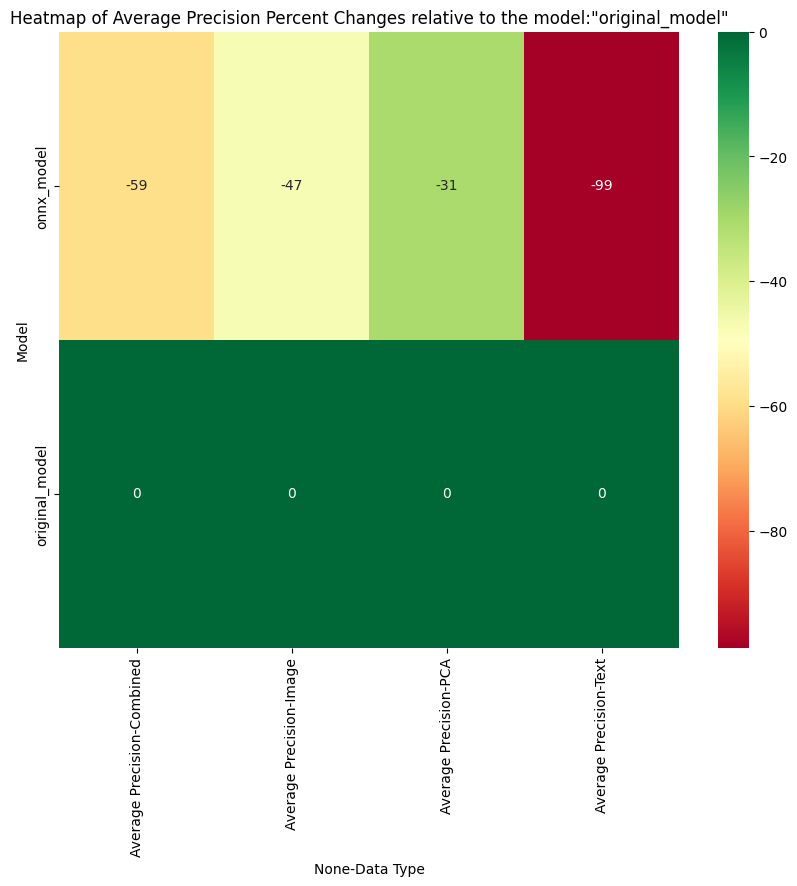

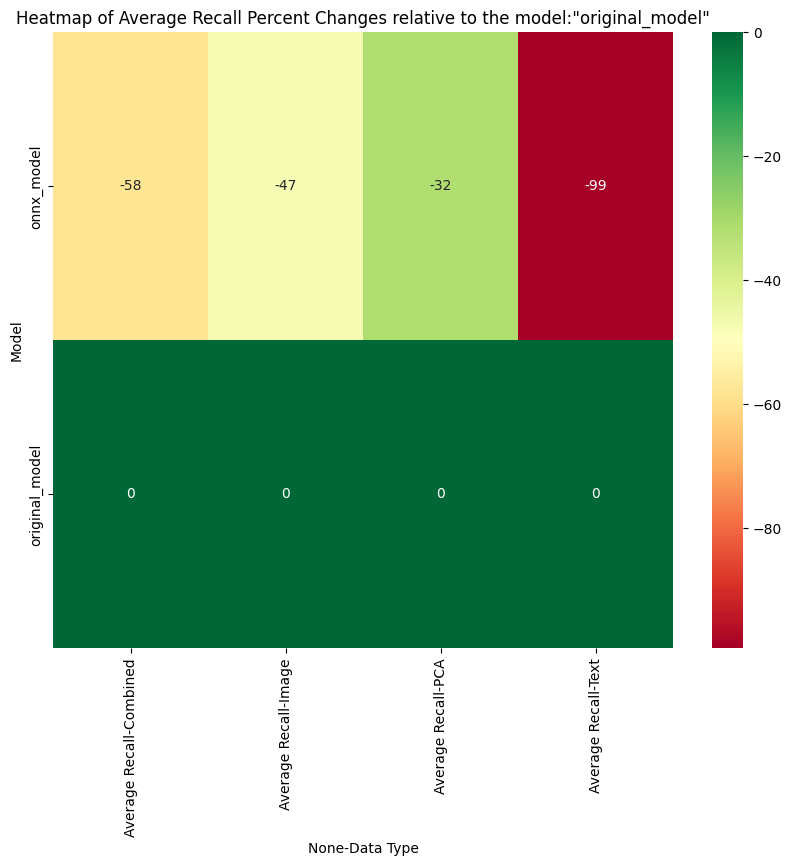

In [13]:
baseline_model_name = "original_model"
plot_heatmaps(result, baseline_model_name)

# MLP

In [14]:
import numpy as np
import torch
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, precision_score, recall_score
import pytorch_lightning as pl
import logging
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score

class ContentClassifier:
    def __init__(self, n_splits=5, problem ='binary'):
        self.n_splits = n_splits
        self.model = None
        self.task = problem

    def _concatenate_features(self, X):
        if isinstance(X, list):
            return np.concatenate(X, axis=1)
        else:
            return X

    def fit(self, X, y, оne_score=True):
        average= self.task
        X = self._concatenate_features(X)
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        scores = []

        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Обучение MLPClassifier
            model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=5000)
            model.fit(X_train, y_train)

            # Оценка производительности
            y_pred = model.predict(X_val)
            f1 = f1_score(y_val, y_pred, average=average)
            precision = precision_score(y_val, y_pred, average=average)
            recall = recall_score(y_val, y_pred, average=average)
            scores.append((f1, precision, recall))

        # Обучение финальной модели
        # self.model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=5000)
        # self.model.fit(X, y)

        if оne_score:
            avg_f1 = sum(score[0] for score in scores) / len(scores)
            avg_precision = sum(score[1] for score in scores) / len(scores)
            avg_recall = sum(score[2] for score in scores) / len(scores)
            return avg_f1, avg_precision, avg_recall
        else:
            return scores

    def predict(self, X):
        if self.model is None:
            raise Exception("Model not trained yet. Call fit() first.")
        X = self._concatenate_features(X)
        return self.model.predict(X)

# # Пример использования:
# X = img_embeddings[is_child_df['index']]
# y = is_child_df['target'].values 
# classifier = ContentClassifier(n_splits=5)
# avg_f1, avg_precision, avg_recall = classifier.fit(X, y)
# print(f"Average F1-score: {avg_f1}, Average Precision: {avg_precision}, Average Recall: {avg_recall}")


def calculate_metrics(X_text, X_img, y,
                      model_name='clip-ViT-B-32-multilingual-v1',
                      task='IsAdult',
                      data_type=['Text', 'Image', 'Combined', 'PCA'],average="binary"):
    # Нормализация данных перед применением PCA и UMAP
    scaler = StandardScaler()

    # Создание объектов классификаторов
    classifier_text = ContentClassifier(n_splits=5, problem = average)
    classifier_img = ContentClassifier(n_splits=5, problem = average)
    classifier_combined = ContentClassifier(n_splits=5, problem = average)
    classifier_pca = ContentClassifier(n_splits=5, problem = average)
    #classifier_umap = ContentClassifier(n_splits=5)

    # Классификация для текстовых данных
    avg_f1_text, avg_precision_text, avg_recall_text = classifier_text.fit(
        X_text, y)

    # Классификация для изображений
    avg_f1_img, avg_precision_img, avg_recall_img = classifier_img.fit(
        X_img, y)

    # Объединение данных
    X_combined = np.concatenate([X_text, X_img], axis=1)

    # Классификация для объединенных данных
    avg_f1_combined, avg_precision_combined, avg_recall_combined = classifier_combined.fit(
        X_combined, y)

    # Применение PCA
    X_pca = PCA(n_components=512).fit_transform(
        scaler.fit_transform(X_combined))
    avg_f1_pca, avg_precision_pca, avg_recall_pca = classifier_pca.fit(
        X_pca, y)

    # Применение UMAP
    # X_umap = umap.UMAP(n_components=512).fit_transform(
    #     scaler.fit_transform(X_combined))
    # avg_f1_umap, avg_precision_umap, avg_recall_umap = classifier_umap.fit(
    #     X_umap, y)

    return {
        'Model': model_name,
        'Task': task,
        'Data Type': data_type,
        'Average F1-score': [avg_f1_text, avg_f1_img, avg_f1_combined, avg_f1_pca],
        'Average Precision': [avg_precision_text, avg_precision_img, avg_precision_combined, avg_precision_pca],
        'Average Recall': [avg_recall_text, avg_recall_img, avg_recall_combined, avg_recall_pca]
    }
    
    
    
def get_metics(model_names, emb_path, tasks, df, save_path=r'D:\wb\fine-tuned-ruclip_result.csv',average='binary'):
    columns = ['Model', 'Task', 'Data Type', 'Average F1-score', 'Average Precision', 'Average Recall']
    result_df = pd.DataFrame(columns=columns)
    
    total_iterations = len(model_names) * len(tasks)
    progress_bar = tqdm(total=total_iterations, desc='Progress')
    
    for model in range(len(model_names)):
        embeddings_path = emb_path[model]
        # Загрузка эмбедингов
        embeddings = np.load(embeddings_path)
        text_embeddings = embeddings['text']
        img_embeddings = embeddings['img']
        model_name = model_names[model]
        
        for i in range(len(tasks)):
            task = tasks[i]
            X_text = text_embeddings[df[i]['index']]
            X_img = img_embeddings[df[i]['index']]
            y = df[i]['target'].values
            
            metrics = calculate_metrics(X_text, X_img, y,
                                        model_name=model_name,
                                        task=task,
                                        average=average)
            
            metrics = pd.DataFrame(metrics)
            result_df = pd.concat([result_df, metrics])
            result_df.to_csv(save_path)
            
            progress_bar.update(1)
    
    progress_bar.close()
    return result_df

In [15]:
import warnings
warnings.filterwarnings("ignore")

tasks = ['IsAdult','Male/Famale_Clothes','IsChild_Clothes']


df = [is_adult_df,male_female_df,is_child_df]
save_path = r'D:\wb\results\binory_mlp_onnx.csv'
result = get_metics(model_names,emb_path,tasks ,df,save_path)
result

Progress: 100%|██████████| 6/6 [13:06<00:00, 131.06s/it]


,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,original_model,IsAdult,Text,0.901541,0.926206,0.879685
1,original_model,IsAdult,Image,0.748216,0.820232,0.688483
2,original_model,IsAdult,Combined,0.888188,0.890112,0.887177
3,original_model,IsAdult,PCA,0.909376,0.940659,0.880726
0,original_model,Male/Famale_Clothes,Text,0.719194,0.744912,0.696914
1,original_model,Male/Famale_Clothes,Image,0.888194,0.890651,0.886986
2,original_model,Male/Famale_Clothes,Combined,0.910583,0.921724,0.900159
3,original_model,Male/Famale_Clothes,PCA,0.912287,0.924915,0.900247
0,original_model,IsChild_Clothes,Text,0.841617,0.845924,0.839300
1,original_model,IsChild_Clothes,Image,0.905095,0.902835,0.907728


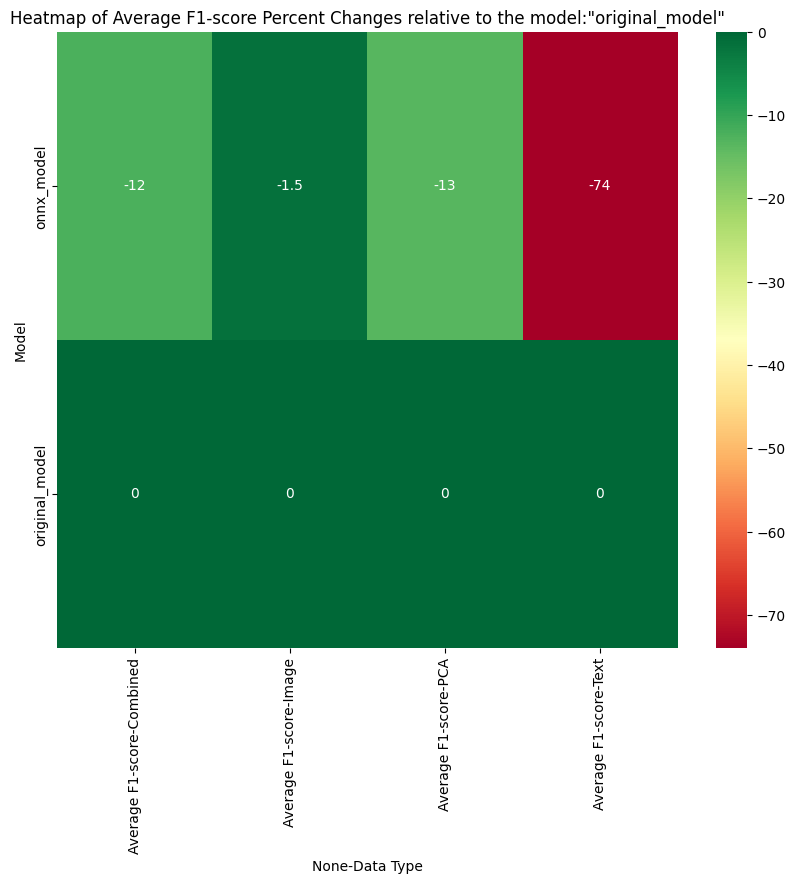

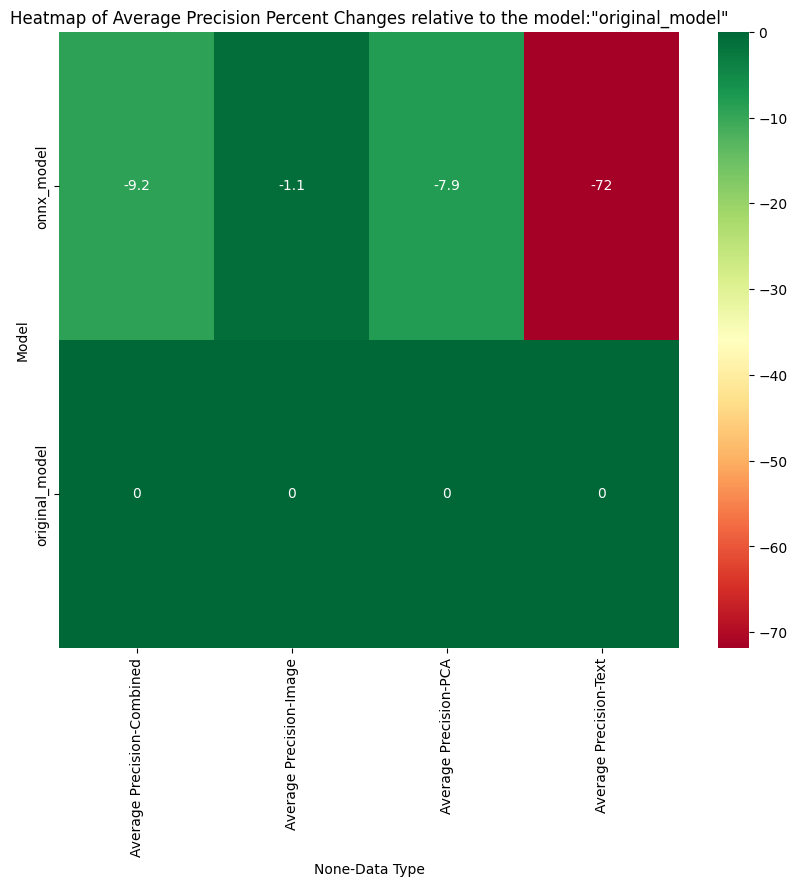

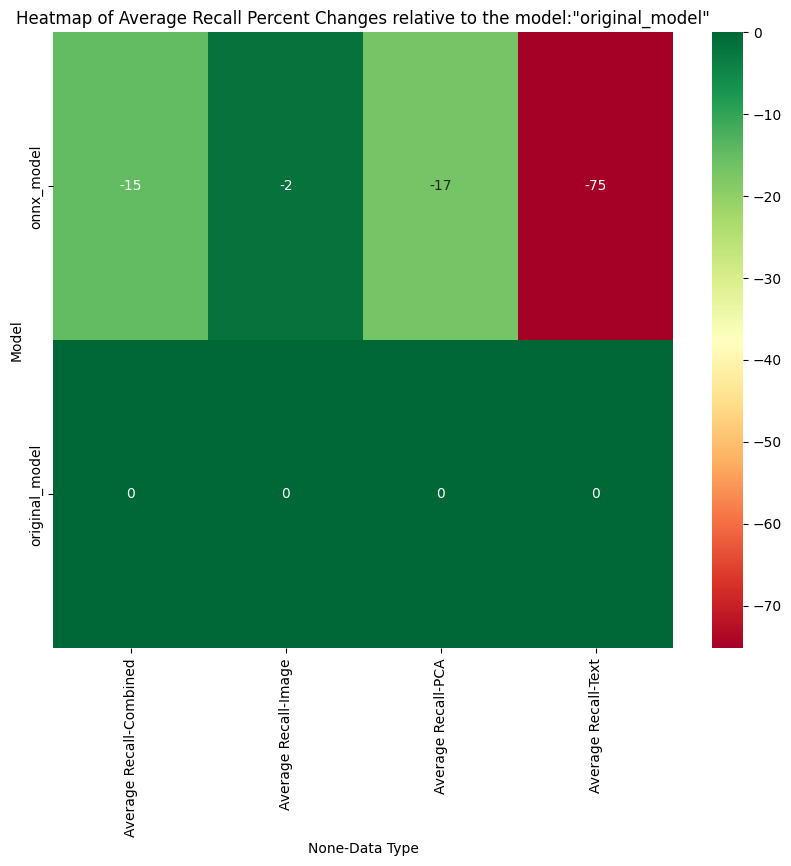

In [16]:
baseline_model_name = "original_model"
plot_heatmaps(result, baseline_model_name)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных меток в числовые
y_cat = label_encoder.fit_transform(test_df['category'])

def replace_subcategory(df):
    # Создание копии DataFrame
    df_modified = df.copy()

    # Группировка по sub_category и подсчет количества строк в каждой группе
    counts = df_modified.groupby('sub_category').size()

    # Получение списка sub_category, где количество строк меньше 4
    sub_categories_to_replace = counts[counts < 11].index.tolist()

    # Замена sub_category на category для подходящих групп
    for sub_category in sub_categories_to_replace:
        category_value = df_modified.loc[df_modified['sub_category'] == sub_category, 'category'].iloc[0]
        df_modified.loc[df_modified['sub_category'] == sub_category, 'sub_category'] = category_value

    return df_modified

sub_df = replace_subcategory(test_df)


# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных меток в числовые
y_sub = label_encoder.fit_transform(sub_df['sub_category'])

In [18]:
def get_metics(model_names, emb_path, tasks, df, save_path=r'D:\wb\fine-tuned-ruclip_result.csv',average='binary'):
    columns = ['Model', 'Task', 'Data Type', 'Average F1-score', 'Average Precision', 'Average Recall']
    result_df = pd.DataFrame(columns=columns)
    
    total_iterations = len(model_names) * len(tasks)
    progress_bar = tqdm(total=total_iterations, desc='Progress')
    
    for model in range(len(model_names)):
        embeddings_path = emb_path[model]
        # Загрузка эмбедингов
        embeddings = np.load(embeddings_path)
        text_embeddings = embeddings['text']
        img_embeddings = embeddings['img']
        model_name = model_names[model]
        
        for i in range(len(tasks)):
            task = tasks[i]
            X_text = text_embeddings
            X_img = img_embeddings
            y = df[i]
            
            metrics = calculate_metrics(X_text, X_img, y,
                                        model_name=model_name,
                                        task=task,
                                        average=average)
            
            metrics = pd.DataFrame(metrics)
            result_df = pd.concat([result_df, metrics])
            result_df.to_csv(save_path)
            
            progress_bar.update(1)
    
    
    progress_bar.close()
    return result_df

In [19]:
import warnings
warnings.filterwarnings("ignore")

tasks = ['Category',"SubCategory"]

df = [y_cat,y_sub]
save_path =r'D:\wb\results\multy_mlp_onnx.csv'


result = get_metics(model_names, emb_path, tasks , df, save_path,average='weighted')
result

Progress: 100%|██████████| 4/4 [3:17:18<00:00, 2959.69s/it]


,Model,Task,Data Type,Average F1-score,Average Precision,Average Recall
0,original_model,Category,Text,0.810973,0.812772,0.811152
1,original_model,Category,Image,0.661873,0.663826,0.662495
2,original_model,Category,Combined,0.830819,0.832572,0.830678
3,original_model,Category,PCA,0.839008,0.840144,0.839300
0,original_model,SubCategory,Text,0.722903,0.738057,0.727849
1,original_model,SubCategory,Image,0.544817,0.564539,0.550206
2,original_model,SubCategory,Combined,0.740857,0.754840,0.746033
3,original_model,SubCategory,PCA,0.732197,0.746347,0.738518
0,onnx_model,Category,Text,0.019203,0.019361,0.019626
1,onnx_model,Category,Image,0.634015,0.635866,0.634348


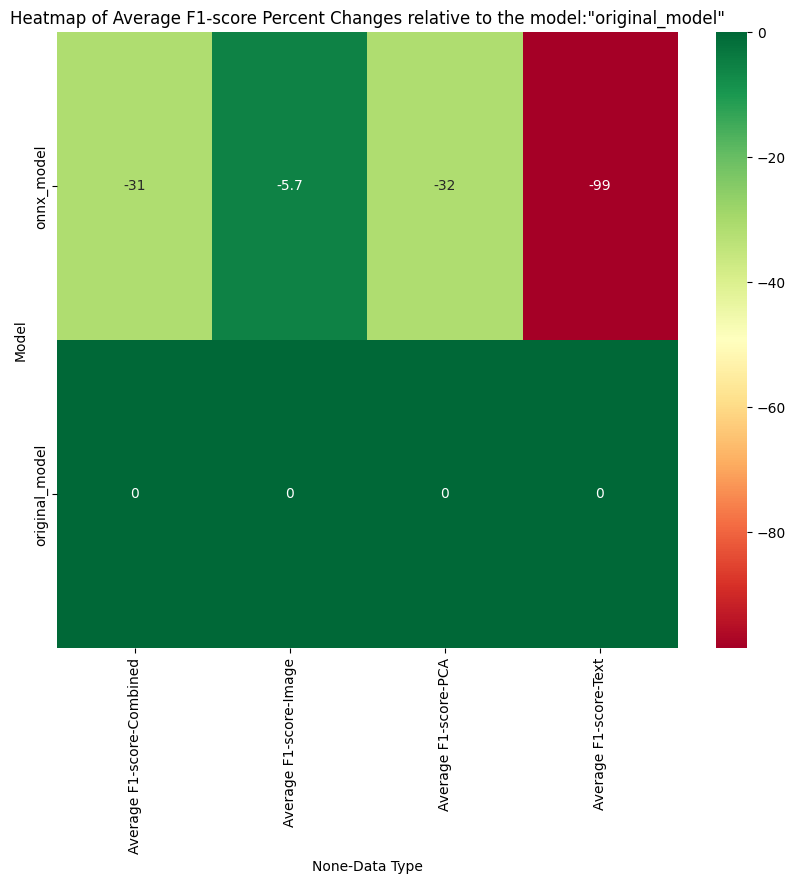

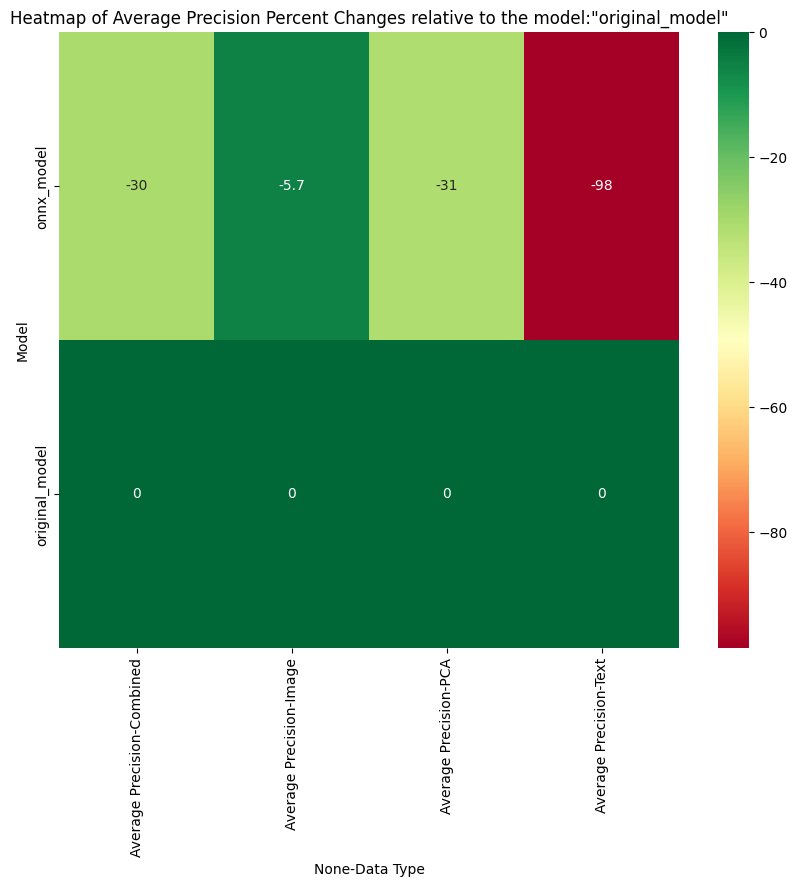

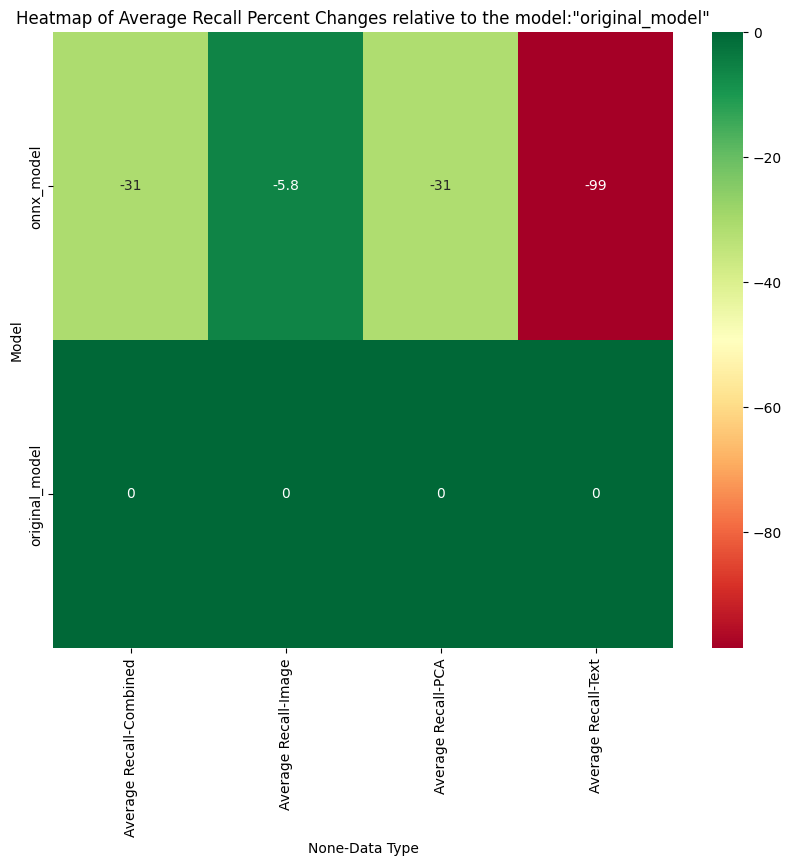

In [20]:
baseline_model_name = "original_model"
plot_heatmaps(result, baseline_model_name)